# Predict Rental Prices for U.S. Apartments


### Introduction:

- <b>Motivation:</b> The rising importance of understanding rental markets and predicting rental prices has motivated this project. The goal is to leverage data analysis techniques to gain insights into the factors influencing rental prices for apartments in various cities in the United States.</br>


- <b>Problem Summary:</b> The project addresses the challenge of predicting rental prices based on diverse apartment characteristics. It involves both quantitative and qualitative variables, making it a comprehensive analysis.<br>


- <b>Dataset Details:</b> The dataset comprises information on 100,000 apartments, including features such as amenities, bathrooms, bedrooms, fees, pets allowed, square feet, city name, state, source, and the target variable: rent price.<br>


### Exploratory Data Analysis (EDA):

<u>Quantitative Variable Analysis - Bathrooms and Square Feet</u> </br>

Explored quantitative variables such as bathrooms and square feet through various analyses:

- <b>Frequency Table and Histogram:</b> Examined the distribution of bathrooms and square footage using frequency tables and histograms.</br>


- <b>Summary Measures and Standard Deviation:</b> Computed mean, median, minimum, maximum, and standard deviation for bathrooms and square feet.</br> 


- <b>Boxplot, Outliers, and Skewness:</b> Utilized boxplots to visualize distribution, identify outliers, and calculate skewness.</br>


- <b>Correlation Analysis:</b> Investigated correlations between rental prices and the number of bathrooms, as well as between rental prices and the square footage of apartments. </br>


- <b>Scatter Matrix:</b> Created scatter matrices to visualize relationships between price, bathrooms, and square footage. </br>


- <b>Multiple Regression Analysis:</b> between the price and the number of bathrooms, as well as the price and the square feet of the apartment, I also interpreted the correlation coefficient of these variables; I plotted a scatter matrix of Price and bathrooms, square feet. </br>
    
<u>Qualitative Variable Analysis - Amenities and Price Category</u>

Extended the analysis to qualitative variables, precisely amenities and price category (low, medium, or high):

- <b>Amenities Frequency Table:</b> Generated a frequency table to understand the distribution of amenities.</br>


- <b>Amenities Bar Chart and Pie Chart:</b> Visualized the frequency of amenities using bar charts and pie charts.</br>


- <b>Amenities Histogram:</b> Visualized the distribution of amenities using a histogram.</br>


- <b>Price Category Frequency Table:</b> Created a frequency table for the price category (low, medium, high).</br>


- <b>Price Category Bar Chart and Pie Chart:</b> Visualized the distribution of price categories using bar charts and pie charts.</br>


- <b>Data Splitting and Logistic Regression:</b></br>


    - Data Splitting
Divided the data into 70% training and 30% test sets.

    - Logistic Regression
I performed a multiple logistic regression to predict the rental price class (low, medium, or high) using variables such as bathrooms and square feet.

<b>Conclusion</b>

<p>This project aimed to predict rental prices for U.S. apartments using a diverse dataset. The analysis covered quantitative (e.g., bathrooms, square footage) and qualitative variables (e.g., amenities, price categories). Initial steps included data cleaning and exploratory analysis. Multiple regression analyzed correlations with rental prices. Exploratory analyses were extended to qualitative variables, utilizing frequency tables, charts, and pie charts.
In the predictive phase, a logistic regression model categorized prices (low, medium, high). Evaluation using a confusion matrix identified performance variations, suggesting areas for improvement, especially in balancing precision and recall for the "medium" category. The project underscored the significance of interpreting results and linking findings to concepts like correlation analysis and classification metrics learned in class.</p>


### Project Outline
- Step 1: Selecting the data
- Step 2: Data Analysis
	 - Part 1: Analyzing quantitative data
	 - Part 2: Analyzing qualitative data
- Step 3: Report

<div style="
            display: block;
            color: Black;
            border-radius: 5px;
            background-color: #00acc1;
            font-size: 160%;
            font-family: lora;">
    <p style="padding: 10px; color: White; text-align: center;">Step 1: Selecting the data</p> </div>

### Project Description<br>
<p>
The dataset contains 100,000 rows and 22 characteristics about apartments for rent in different cities in the United States. The primary purpose is to build a linear regression model that predicts the rental price based on square footage, number of bedrooms, and location, among other variables that can be determinants. Then, I will build another model to classify rental prices into three ranges: low, medium and high.
</p>

### Dataset Sitation
Apartment for rent classified. (2019). UCI Machine Learning Repository.<br> 
	https://doi.org/10.24432/C5X623. <br>

<div style="
            display: block;
            color: Black;
            border-radius: 5px;
            background-color: #00acc1;
            font-size: 160%;
            font-family: lora;">
    <p style="padding: 10px; color: White; text-align: center;">Step 2: Data Analysis</p> </div>
    
#### Selecting, exploring, and cleaning the data

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Install the UCI Repository package
!pip install ucimlrepo --quiet --no-warn-script-location

In [91]:
# importing the UCI Repository
from ucimlrepo import fetch_ucirepo

In [93]:
# Fetch the dataset from the UCI repository
apartment_for_rent_classified = fetch_ucirepo(id=555)

# Combine features and targets into a single DataFrame
apartments_for_rents_df = pd.concat([apartment_for_rent_classified.data.features, apartment_for_rent_classified.data.targets], axis=1)

# Print sample rows to verify
apartments_for_rents_df.head(5)

C:\Users\indet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [94]:
# Getting columns and datatype info from the dataset
apartments_for_rents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [95]:
print(apartments_for_rents_df.columns)

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [96]:
# Selecting the required columns for the analysis
apartment_columns_selected = apartments_for_rents_df[['title','amenities','bathrooms','bedrooms',
    'fee','pets_allowed','price','square_feet','cityname','state','source']]

# Showing the selected columns with sample rows
apartment_columns_selected.head(5)

,title,amenities,bathrooms,bedrooms,fee,pets_allowed,price,square_feet,cityname,state,source
0,One BR 507 & 509 Esplanade,NaN,1,1,No,Cats,2195.0,542,Redondo Beach,CA,RentLingo
1,Three BR 146 Lochview Drive,NaN,1.5,3,No,"Cats,Dogs",1250.0,1500,Newport News,VA,RentLingo
2,Three BR 3101 Morningside Drive,NaN,2,3,No,NaN,1395.0,1650,Raleigh,NC,RentLingo
3,Two BR 209 Aegean Way,NaN,1,2,No,"Cats,Dogs",1600.0,820,Vacaville,CA,RentLingo
4,One BR 4805 Marquette NE,NaN,1,1,No,"Cats,Dogs",975.0,624,Albuquerque,NM,RentLingo


In [97]:
# Dropping the duplicate values
df_no_duplicates = apartment_columns_selected.drop_duplicates()

# Checking the duplicates values again
no_duplicates = df_no_duplicates.duplicated().sum()

# Printing the duplicates again
print(f"After removing the duplicates values we have: {no_duplicates}" + " Dulpicates values in the entire dataset")

After removing the duplicates values we have: 0 Dulpicates values in the entire dataset


In [98]:
# Verifying mising values
pd.isnull(df_no_duplicates).sum()

title               0
amenities       15987
bathrooms          65
bedrooms          126
fee                 2
pets_allowed    60240
price               4
square_feet         2
cityname          303
state             303
source              5
dtype: int64

In [99]:
# Making a new dataframe copy
missing_cleaned_df = df_no_duplicates.copy()

# Replace missing values with the most frequent value in each column
missing_cleaned_df['amenities'].fillna(missing_cleaned_df['amenities'].mode()[0], inplace=True)
missing_cleaned_df['bathrooms'].fillna(missing_cleaned_df['bathrooms'].mode()[0], inplace=True)
missing_cleaned_df['bedrooms'].fillna(missing_cleaned_df['bedrooms'].mode()[0], inplace=True)
missing_cleaned_df['cityname'].fillna(missing_cleaned_df['cityname'].mode()[0], inplace=True)
missing_cleaned_df['state'].fillna(missing_cleaned_df['state'].mode()[0], inplace=True)

# Replacing 'null' value by 'None", asuming don't allow pets
missing_cleaned_df['pets_allowed'].fillna('None', inplace=True)


# Cheking missing values again
print("Verifying missing values again:" + "\n"+"\n" , str(pd.isnull(missing_cleaned_df).sum()))

Verifying missing values again:

 title           0
amenities       0
bathrooms       0
bedrooms        0
fee             2
pets_allowed    0
price           4
square_feet     2
cityname        0
state           0
source          5
dtype: int64


In [100]:
# Replace non-standard missing values with NaN
missing_cleaned_df.replace(['', 'null', 'NA'], np.nan, inplace=True)

# Recheck and reapply the fill operation
missing_cleaned_df['amenities'].fillna(missing_cleaned_df['amenities'].mode()[0], inplace=True)
missing_cleaned_df['bathrooms'].fillna(missing_cleaned_df['bathrooms'].mode()[0], inplace=True)
missing_cleaned_df['bedrooms'].fillna(missing_cleaned_df['bedrooms'].mode()[0], inplace=True)
missing_cleaned_df['cityname'].fillna(missing_cleaned_df['cityname'].mode()[0], inplace=True)
missing_cleaned_df['state'].fillna(missing_cleaned_df['state'].mode()[0], inplace=True)

In [101]:
# Verify that the changes were made correctly
print(missing_cleaned_df.head())  # Check the first few rows
print(missing_cleaned_df.info())  # Get summary info to see if data types and missing values were updated

                             title amenities bathrooms bedrooms fee  \
0       One BR 507 & 509 Esplanade   Parking         1        1  No   
1      Three BR 146 Lochview Drive   Parking       1.5        3  No   
2  Three BR 3101 Morningside Drive   Parking         2        3  No   
3            Two BR 209 Aegean Way   Parking         1        2  No   
4         One BR 4805 Marquette NE   Parking         1        1  No   

  pets_allowed   price square_feet       cityname state     source  
0         Cats  2195.0         542  Redondo Beach    CA  RentLingo  
1    Cats,Dogs  1250.0        1500   Newport News    VA  RentLingo  
2         None  1395.0        1650        Raleigh    NC  RentLingo  
3    Cats,Dogs  1600.0         820      Vacaville    CA  RentLingo  
4    Cats,Dogs   975.0         624    Albuquerque    NM  RentLingo  
<class 'pandas.core.frame.DataFrame'>
Index: 99301 entries, 0 to 99825
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------ 

In [102]:
# Inspect the unique values in the 'bedrooms' column to identify non-numeric values
print("Unique values in 'bedrooms' column before cleaning:", missing_cleaned_df['bedrooms'].unique())

# Use the `pd.to_numeric()` function to coerce non-numeric values to NaN (missing values)
missing_cleaned_df['bedrooms'] = pd.to_numeric(missing_cleaned_df['bedrooms'], errors='coerce')

# Drop or replace rows with missing values in the 'bedrooms' column (optional)
missing_cleaned_df = missing_cleaned_df.dropna(subset=['bedrooms'])

# Convert the 'bedrooms' column to integer data type
missing_cleaned_df['bedrooms'] = missing_cleaned_df['bedrooms'].astype(int)

# Verify the data type of 'bedrooms' after conversion
print("Unique values in 'bedrooms' column after cleaning:", missing_cleaned_df['bedrooms'].unique())
print(missing_cleaned_df.dtypes)

Unique values in 'bedrooms' column before cleaning: ['1' '3' '2' '4' '0' '5' '7' '8' '6' '9' 'Thumbnail' 'Cats,Dogs' 2.0 3.0
 1.0 4.0 5.0 0.0 6.0]
Unique values in 'bedrooms' column after cleaning: [1 3 2 4 0 5 7 8 6 9]
title            object
amenities        object
bathrooms        object
bedrooms          int32
fee              object
pets_allowed     object
price           float64
square_feet      object
cityname         object
state            object
source           object
dtype: object


In [103]:
# fee with the most frequent value or a default value like 'No Fee'.
missing_cleaned_df['fee'].fillna('No Fee', inplace=True)

In [104]:
# Fill with median price
missing_cleaned_df['price'].fillna(missing_cleaned_df['price'].median(), inplace=True)

In [105]:
# Fill source with the most frequent value or use a placeholder like 'Unknown'.
missing_cleaned_df['source'].fillna('Unknown', inplace=True)

In [106]:
# Filling the missing values with the median or mean 
missing_cleaned_df['square_feet'].fillna(missing_cleaned_df['square_feet'].mode()[0], inplace=True)

In [107]:
# Remove NaN values from the 'bathrooms' column
cleaned_bathrooms = missing_cleaned_df['bathrooms'].dropna()

In [108]:
# Check if any missing values remain in the DataFrame
print("Remaining missing values in each column:")
print(missing_cleaned_df.isnull().sum())

Remaining missing values in each column:
title           0
amenities       0
bathrooms       0
bedrooms        0
fee             0
pets_allowed    0
price           0
square_feet     0
cityname        0
state           0
source          0
dtype: int64


In [109]:
# Convert columns to numeric types if necessary
missing_cleaned_df['bathrooms'] = pd.to_numeric(missing_cleaned_df['bathrooms'], errors='coerce')
missing_cleaned_df['bedrooms'] = pd.to_numeric(missing_cleaned_df['bedrooms'], errors='coerce')
missing_cleaned_df['square_feet'] = pd.to_numeric(missing_cleaned_df['square_feet'], errors='coerce')

### Part 1: Analyzing quantitative data

<h4>Basic statistics from the entire dataset</h4>

In [110]:
missing_cleaned_df.describe()

,bathrooms,bedrooms,price,square_feet
count,99298.000000,99298.000000,99298.000000,99298.000000
mean,1.444747,1.728464,1527.573284,956.493847
std,0.547069,0.749295,905.039872,418.044555
min,1.000000,0.000000,100.000000,101.000000
25%,1.000000,1.000000,1013.000000,728.000000
50%,1.000000,2.000000,1350.000000,900.000000
75%,2.000000,2.000000,1795.000000,1116.000000
max,9.000000,9.000000,52500.000000,50000.000000


Some Basic Insights and Conclusions from the Dataset.describe() Result:

<b>Count:</b> After cleaning and removing duplicates, there are:
<b>Bathrooms:</b> 99,298 records.
<b>Bedrooms:</b> 99,298 records.
<b>Price:</b> 99,301 records.
<b>Square Feet:</b> 99,299 records.

<b>Bathrooms and Bedrooms:</b>
- The average number of <b>bathrooms</b> is approximately <b>1.44</b>, with a minimum of <b>1</b> and a maximum of <b>9</b>.
- The average number of <b>bedrooms</b> is approximately <b>1.73</b>, with a minimum of <b>0</b> and a maximum of <b>9</b>. The minimum of 0 bedrooms might indicate studio apartments or be a data anomaly.

<b>Price:</b> The average price is around <b>$1527</b>, with a minimum of <b>$100</b> and a maximum of <b>$52,500</b>. The large difference between the average and maximum values suggests the presence of outliers in the dataset that should be investigated further.

<b>Square Feet:</b>
- The average square footage is approximately <b>956</b> square feet, with a minimum of <b>37.62</b> and a maximum of <b>50,000</b>.
- Similar to the price, there is a significant difference between the average and maximum values, which might indicate unusually large properties or potential data entry errors.

<b>Standard Deviation (std):</b> The standard deviation measures the amount of variation or dispersion in a set of values:
- The standard deviation of the number of <b>bathrooms</b> is approximately <b>0.55</b>.
- The standard deviation of the number of <b>bedrooms</b> is approximately <b>0.75</b>.
- The standard deviation of <b>apartment prices</b> is approximately <b>905.03</b>.
- The standard deviation of the <b>square footage</b> is approximately <b>418.05</b>.

<b>Min, 25%, 50%, 75%, Max:</b> These percentiles provide insight into the distribution of the data:
- <b>Bathrooms:</b> The minimum number of bathrooms is <b>1</b>, and the maximum is <b>9</b>. 

- The 25th and 50th percentiles are both <b>1</b>, while the 75th percentile is <b>2</b>.

- <b>Bedrooms:</b> The minimum number of bedrooms is <b>0</b>, and the maximum is <b>9</b>. The 25th percentile is <b>1</b>, the 50th percentile is <b>2</b>, and the 75th percentile is <b>2</b>.

- <b>Price:</b> The prices range from a minimum of <b>$100</b> to a maximum of <b>$52,500</b>. The 25th percentile is <b>$1013</b>, the 50th percentile is <b>$1350</b>, and the 75th percentile is <b>$1795</b>.

- <b>Square Feet:</b> The square footage ranges from a minimum of <b>37.62</b> to a maximum of <b>50,000</b>. The 25th percentile is <b>728</b>, the 50th percentile is <b>900</b>, and the 75th percentile is <b>1116</b>.

<b>Conclusion:</b>
The dataset contains a diverse range of apartments in terms of bathrooms, bedrooms, price, and square footage.
There may be outliers in the <b>'price'</b> and <b>'square_feet'</b> columns, which should be further investigated to understand their impact on the analysis.

The large standard deviations for <b>'price'</b> and <b>'square_feet'</b> suggest significant variability, which might require normalization or transformation for certain analytical approaches.

<h3>Let's explore the <b>bathrooms</b> variable<br> </h3>
<p>This variable is the numbers of bedthrooms for each apartment</p>

Frequency Table

In [111]:
# Making the frequency table for the 'bathrooms' column
bathrooms_freq_table = pd.DataFrame(missing_cleaned_df, columns=['bathrooms'])
bathrooms_freq_table = bathrooms_freq_table['bathrooms'].value_counts().sort_index().reset_index()
bathrooms_freq_table.columns = ['bathrooms', 'frequency']
bathrooms_freq_table['relative frequency'] = bathrooms_freq_table['frequency'] / bathrooms_freq_table['frequency'].sum()

# Print the frequency table for 'bathrooms'
print(bathrooms_freq_table)

    bathrooms  frequency  relative frequency
0         1.0      56299            0.566970
1         1.5       3148            0.031703
2         2.0      36475            0.367329
3         2.5       2076            0.020907
4         3.0        889            0.008953
5         3.5        209            0.002105
6         4.0        120            0.001208
7         4.5         42            0.000423
8         5.0         20            0.000201
9         5.5          4            0.000040
10        6.0          8            0.000081
11        7.0          3            0.000030
12        7.5          1            0.000010
13        8.0          2            0.000020
14        8.5          1            0.000010
15        9.0          1            0.000010


Histogram

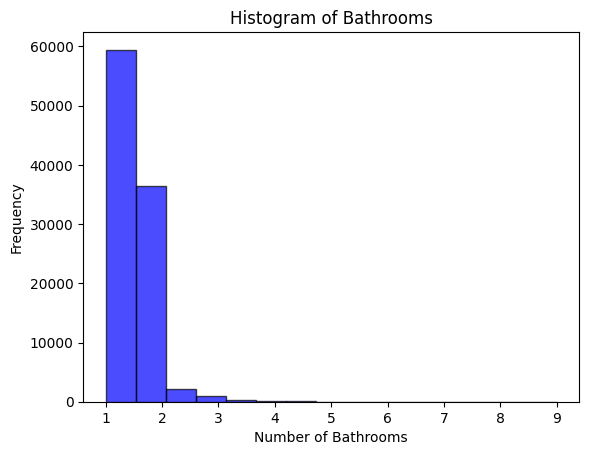

In [112]:
# Plotting the histogram with automatic bins
plt.hist(missing_cleaned_df['bathrooms'], bins=15, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bathrooms')
plt.show()

Summary measures and standard deviation

In [113]:
# Summary measures
mean_bathrooms = missing_cleaned_df['bathrooms'].mean()
median_bathrooms = missing_cleaned_df['bathrooms'].median()
min_bathrooms = missing_cleaned_df['bathrooms'].min()
max_bathrooms = missing_cleaned_df['bathrooms'].max()

# Standard deviation
std_bathrooms = missing_cleaned_df['bathrooms'].std()

print(f'Mean Bathrooms: {mean_bathrooms}')
print(f'Median Bathrooms: {median_bathrooms}')
print(f'Minimum Bathrooms: {min_bathrooms}')
print(f'Maximum Bathrooms: {max_bathrooms}')
print(f'Standard Deviation Bathrooms: {std_bathrooms}')

Mean Bathrooms: 1.4447471248162098
Median Bathrooms: 1.0
Minimum Bathrooms: 1.0
Maximum Bathrooms: 9.0
Standard Deviation Bathrooms: 0.5470694880240272


Boxplot

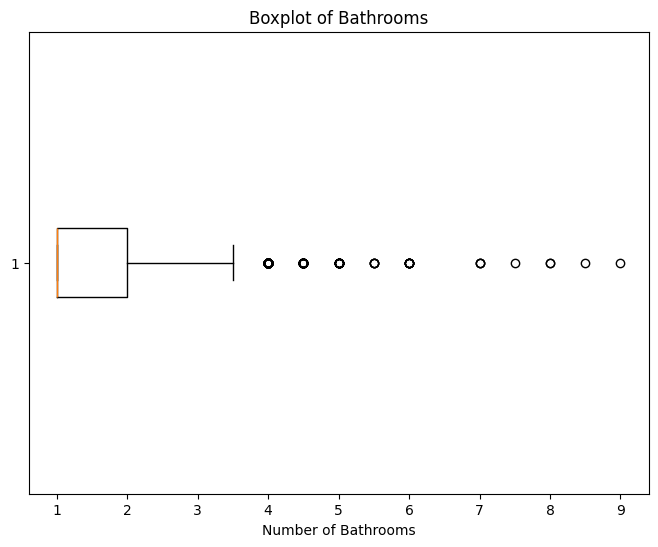

In [114]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(missing_cleaned_df['bathrooms'], vert=False)
plt.xlabel('Number of Bathrooms')
plt.title('Boxplot of Bathrooms')
plt.show()

Outliers and skewnes

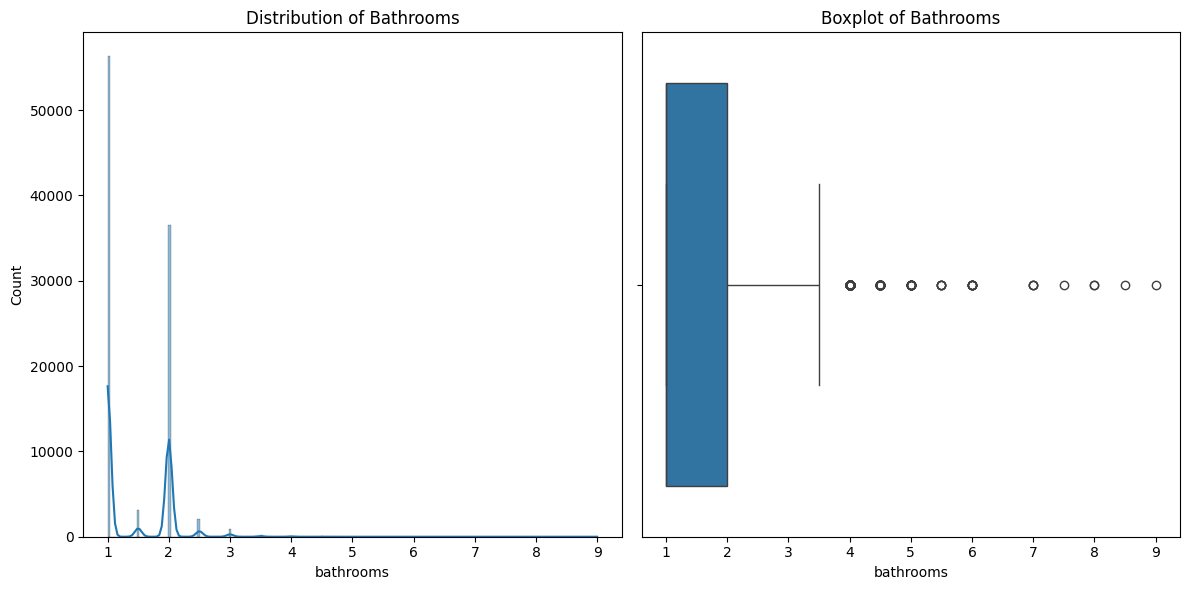

Skewness: 0.9899348737570699
Outliers:
       bathrooms
90           4.0
477          7.0
583          4.0
630          4.0
919          4.5
...          ...
98333        4.0
98942        4.0
98944        4.0
98986        4.5
99643        4.0

[202 rows x 1 columns]


In [116]:
# Calculate skewness
skewness = missing_cleaned_df['bathrooms'].skew()

# Calculate quartiles
Q1 = missing_cleaned_df['bathrooms'].quantile(0.25)
Q3 = missing_cleaned_df['bathrooms'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = missing_cleaned_df[(missing_cleaned_df['bathrooms'] < lower_bound) | (missing_cleaned_df['bathrooms'] > upper_bound)]

# Plotting the distribution and boxplot
plt.figure(figsize=(12, 6))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(missing_cleaned_df['bathrooms'], kde=True)
plt.title('Distribution of Bathrooms')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=missing_cleaned_df['bathrooms'])
plt.title('Boxplot of Bathrooms')

plt.tight_layout()
plt.show()

# Print skewness
print(f'Skewness: {skewness}')

# Print outliers
print('Outliers:')
print(outliers[['bathrooms']])


<b>Note:</b><br>
Skewness is a measure of the asymmetry or skew of a probability distribution. In the context of data analysis, it indicates the extent and direction of skew (departure from horizontal symmetry) in a dataset.<br>

key points about skewness:<br>

1. <b>Positive Skewness (Right Skew):</b><br>If the skewness is greater than 0, the distribution of the data is skewed to the right. This means that the right tail is longer or fatter than the left tail, and the bulk of the values is concentrated on the left side.
2. <b>Negative Skewness (Left Skew):</b><br>If the skewness is less than 0, the distribution is skewed to the left. In this case, the left tail is longer or fatter than the right tail, and the majority of values are concentrated on the right side.
3. <b>Zero Skewness:</b><br> A skewness of 0 indicates a perfectly symmetrical distribution, where the left and right tails are of equal length.
4. <b>Conclusion about the bathrooms skewness</b><br>
A skewness value of 0.9877 indicates that the distribution of the 'bathrooms' column in the dataset is positively skewed (right-skewed). This means that the right tail of the distribution is longer or fatter than the left tail, and the majority of values are concentrated on the left side. Bathrooms of 1 to 3.5 by apartment. This suggests that there may be some data points with higher values (outliers) that are causing the distribution to be pulled towards the right. Positive skewness doesn't necessarily indicate a problem, but it's important to be aware of it when analyzing the data.<br>

<b>Note about outliers:</b><br>
Investigate and Understand: Before making any decisions, we need to investigate why these outliers exist. Are they valid data points or errors? Understanding the nature of these values is crucial.

Correlation between <b>price and bathrooms</b>, and interpreting them.

In [117]:
correlation = missing_cleaned_df['price'].corr(missing_cleaned_df['bathrooms'])
print(f'Correlation between price and bathrooms: {correlation}')

Correlation between price and bathrooms: 0.3288299051968544


Interpretation of correlation between price and bathrooms:<br>
- The correlation coefficient between price and bathrooms is approximately 0.33.
- <b>Positive Correlation (Weak): </b><br>
The positive sign indicates that there is a positive relationship between the two variables. As the number of bathrooms increases, the price tends to increase slightly.<br>
- <b>Strength of Correlation (Weak):</b><br>
The correlation coefficient of 0.33 suggests a weak positive correlation. It's not a very strong relationship, but there is a tendency for higher bathroom counts to be associated with higher prices.

Plot the scatter matrix of Price and Bathrooms and interpret it.

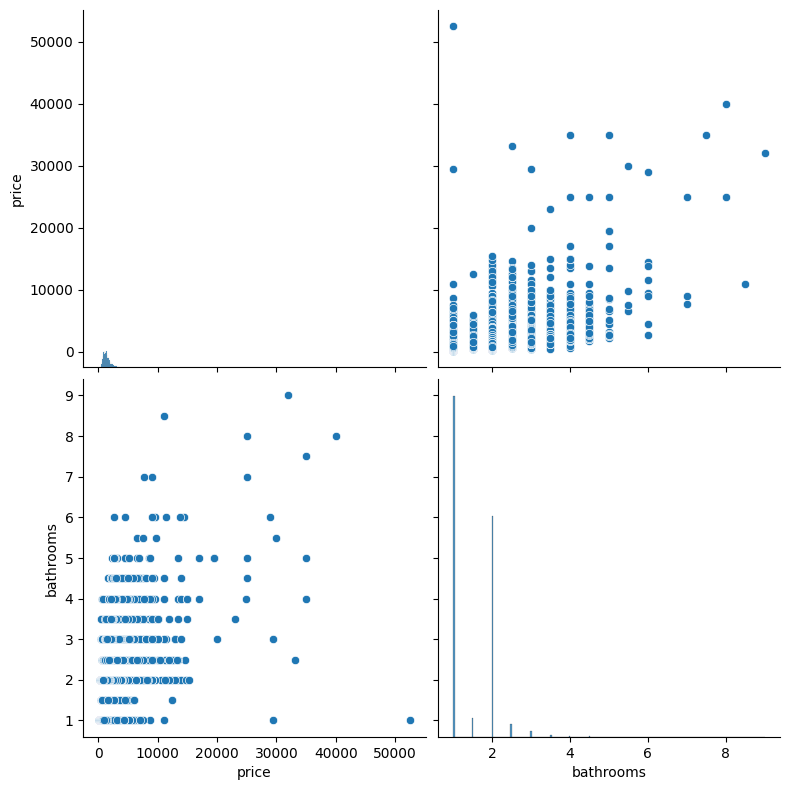

In [118]:
# Create a scatter matrix
scatter_matrix = sns.pairplot(missing_cleaned_df[['price', 'bathrooms']], height=4)

# Show the plot
plt.show()

<b>Scatter Matrix Interpretation</b><br>
The dispersion matrix clearly shows a positive relationship between the number of bathrooms and the rental price. However, this relationship needs to be stronger based on the above calculation of the ratio coefficient. The distribution graph shows that most data concentrates between 1 and 3.5 bathrooms. This positive correlation indicates a moderate positive relationship between the two variables.

<h3>Let's explore the <b>square_feet</b> variable<br> </h3>
<p>This variable represent the size of the apartment</p>

Frequency table<br>

<b>Note:</b><br>
Let's make a frequency table directly with the square_foot variable. It will indicate many unique values in that variable,each occurring only once <br> (frequency equals 1). It suggests a wide range of different square footage values in the data set,making it difficult to establish meaningful patterns or trends from the frequency table at this level of granularity.For continuous variables such as square_feet,it is best to create intervals or ranges and then generate a frequency table based on those intervals. It will help visualize the square_foot distribution in a more interpretable way.

In [119]:
# Create bins for square footage
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, np.inf]
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4000+']

# Bin the square footage data
missing_cleaned_df['square_feet_bins'] = pd.cut(missing_cleaned_df['square_feet'], bins=bins, labels=labels)

# Generate frequency table for the binned square footage
square_feet_freq_table = missing_cleaned_df['square_feet_bins'].value_counts().sort_index().reset_index()
square_feet_freq_table.columns = ['square_feet_range', 'frequency']
square_feet_freq_table['relative frequency'] = square_feet_freq_table['frequency'] / square_feet_freq_table['frequency'].sum()

# Print the frequency table for binned square footage
print(square_feet_freq_table)

  square_feet_range  frequency  relative frequency
0             0-500       3834            0.038611
1          501-1000      57665            0.580727
2         1001-1500      33178            0.334126
3         1501-2000       3133            0.031551
4         2001-2500        815            0.008208
5         2501-3000        369            0.003716
6         3001-3500        158            0.001591
7         3501-4000         60            0.000604
8             4000+         86            0.000866


Histogram

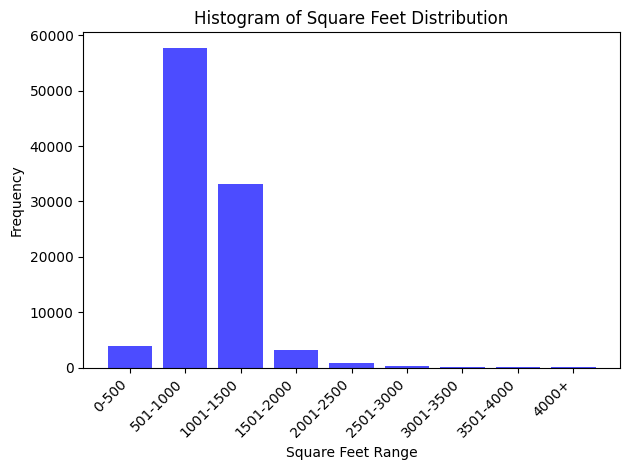

In [120]:
# Plotting the histogram with rotated labels
plt.bar(square_feet_freq_table['square_feet_range'], square_feet_freq_table['frequency'], color='blue', alpha=0.7)
plt.xlabel('Square Feet Range')
plt.ylabel('Frequency')
plt.title('Histogram of Square Feet Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Summary measures and standard deviation

In [121]:
# Summary measures for 'square_feet'
mean_square_feet = missing_cleaned_df['square_feet'].mean()
median_square_feet = missing_cleaned_df['square_feet'].median()
min_square_feet = missing_cleaned_df['square_feet'].min()
max_square_feet = missing_cleaned_df['square_feet'].max()

# Standard deviation for 'square_feet'
std_square_feet = missing_cleaned_df['square_feet'].std()

# Print the results
print(f'Mean Square Feet: {mean_square_feet}')
print(f'Median Square Feet: {median_square_feet}')
print(f'Minimum Square Feet: {min_square_feet}')
print(f'Maximum Square Feet: {max_square_feet}')
print(f'Standard Deviation Square Feet: {std_square_feet}')

Mean Square Feet: 956.4938468045681
Median Square Feet: 900.0
Minimum Square Feet: 101.0
Maximum Square Feet: 50000.0
Standard Deviation Square Feet: 418.0445552523586


Boxplot

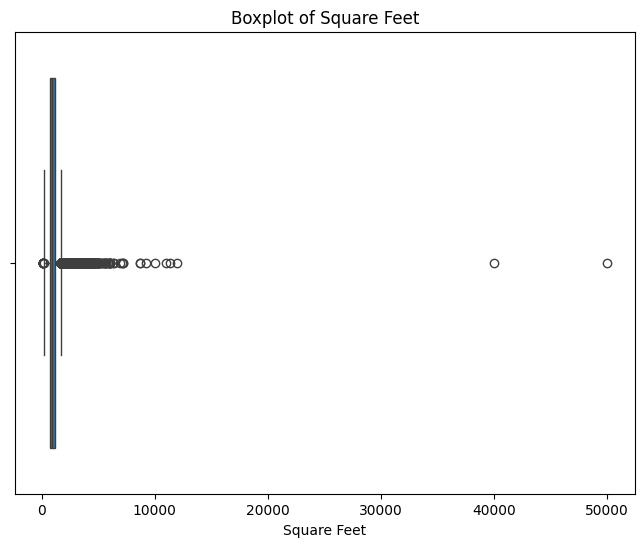

In [122]:
# Plotting the boxplot for 'square_feet'
plt.figure(figsize=(8, 6))
sns.boxplot(x=missing_cleaned_df['square_feet'])
plt.title('Boxplot of Square Feet')
plt.xlabel('Square Feet')
plt.show()

Outliers and skewnes

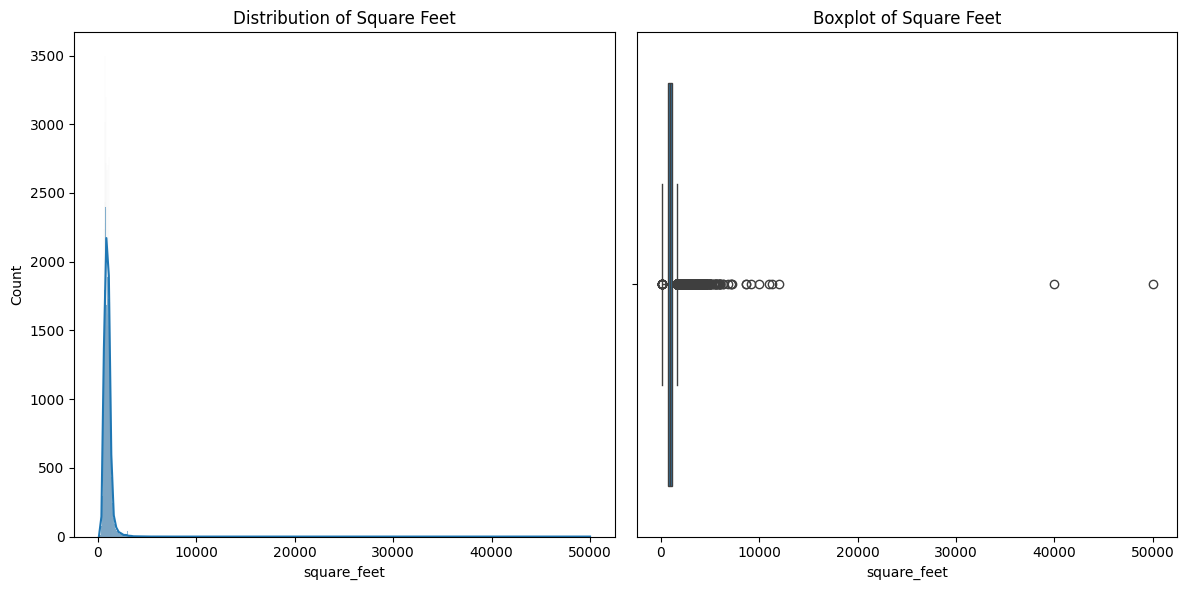

Skewness for Square Feet: 27.087449039140747
Outliers for Square Feet:
       square_feet
11          3077.0
13          4650.0
38          2050.0
39          1739.0
42          3350.0
...            ...
99662       2394.0
99676       1900.0
99768       2252.0
99796       3980.0
99797       2932.0

[2829 rows x 1 columns]


In [124]:
# Calculate skewness for 'square_feet'
skewness_square_feet = missing_cleaned_df['square_feet'].skew()

# Calculate quartiles
Q1_square_feet = missing_cleaned_df['square_feet'].quantile(0.25)
Q3_square_feet = missing_cleaned_df['square_feet'].quantile(0.75)

# Calculate IQR
IQR_square_feet = Q3_square_feet - Q1_square_feet

# Define upper and lower bounds for outliers
lower_bound_square_feet = Q1_square_feet - 1.5 * IQR_square_feet
upper_bound_square_feet = Q3_square_feet + 1.5 * IQR_square_feet

# Identify outliers for 'square_feet'
outliers_square_feet = missing_cleaned_df[
    (missing_cleaned_df['square_feet'] < lower_bound_square_feet) |
    (missing_cleaned_df['square_feet'] > upper_bound_square_feet)
]

# Plotting the distribution and boxplot for 'square_feet'
plt.figure(figsize=(12, 6))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(missing_cleaned_df['square_feet'], kde=True)
plt.title('Distribution of Square Feet')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=missing_cleaned_df['square_feet'])
plt.title('Boxplot of Square Feet')

plt.tight_layout()
plt.show()

# Print skewness for 'square_feet'
print(f'Skewness for Square Feet: {skewness_square_feet}')

# Print outliers for 'square_feet'
print('Outliers for Square Feet:')
print(outliers_square_feet[['square_feet']])

Correlation between price and square_feet , and interpreting them.

In [125]:
# Calculate correlation between 'price' and 'square_feet'
correlation_price_square_feet = missing_cleaned_df['price'].corr(missing_cleaned_df['square_feet'])

# Print the correlation
print(f'Correlation between Price and Square Feet: {correlation_price_square_feet}')

Correlation between Price and Square Feet: 0.37231230587623537


Interpretation of correlation between price and square_feet:<br>
- The positive value (0.372) suggests a positive correlation.
- <b>Magnitude of the Correlation:</b> A value of 0.372 indicates a moderate positive correlation.
- There is a moderate positive linear relationship between the 'Price' and 'Square Feet.' As the 'Square Feet' increases, there tends to be a moderate increase in the 'Price,' and vice versa.

Plot the scatter matrix of Price and square_feet and interpret it.

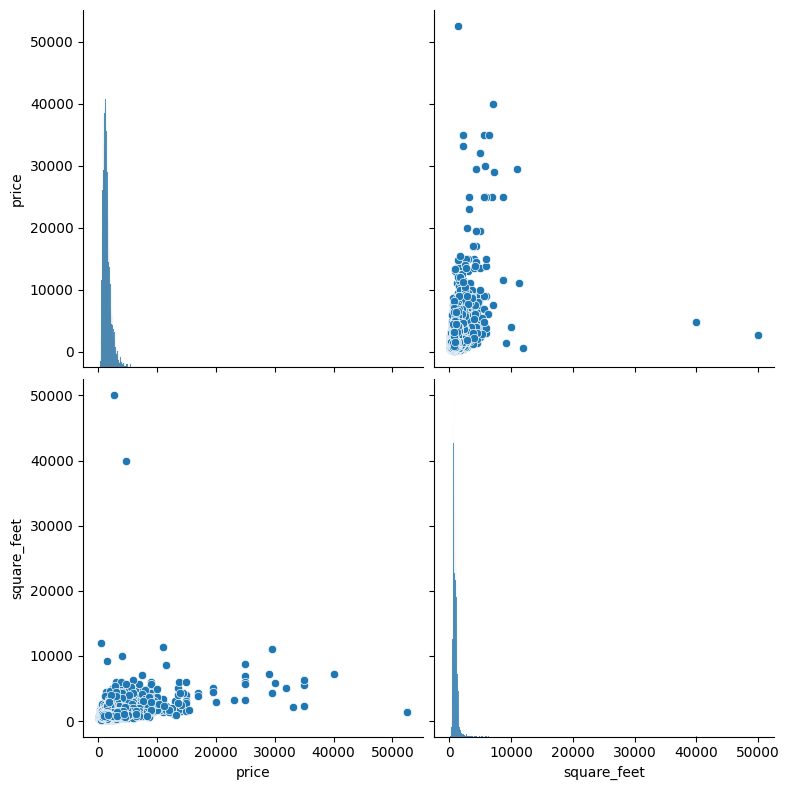

In [126]:
# Create a scatter matrix with customized options
scatter_matrix = sns.pairplot(missing_cleaned_df[['price', 'square_feet']], height=4)

# Show the plot
plt.show()

Scatter Matrix Interpretation:<br>
The dispersion matrix clearly shows a positive relationship between the number of square_feet and the rental price. However, this relationship needs to be stronger based on the above calculation of the ratio coefficient. The distribution graph shows that most data concentrates between 0 to 500 and 500 to 1,500 square feet approximately. This positive correlation indicates a moderate positive relationship between the two variables.

<b>Making a multiple linear regression analysis</b>

- Analyze the coefficients based on estimates
- Coefficient of determination
- Hypothesis testing <br>

By the moment, I will use only the two previous variables (bathrooms and square_feet) as explanatory variables.

In [127]:
# Add a constant to the independent variables matrix
X = sm.add_constant(missing_cleaned_df[['bathrooms', 'square_feet']])

# Dependent variable
y = missing_cleaned_df['price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     9020.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:19:43   Log-Likelihood:            -8.0863e+05
No. Observations:               99298   AIC:                         1.617e+06
Df Residuals:                   99295   BIC:                         1.617e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         583.9899      7.766     75.199      

<b>Interpretation based on the OLS results</b><br>

1.  <b>Coefficients:</b>
    - <b>Intercept (const):</b> The intercept is 583.9899. This represents the estimated price when both 'bathrooms' and 'square_feet' are zero. However, it might not have a practical interpretation since having zero bathrooms or square feet is not realistic.
    - <b>Bathrooms:</b> The coefficient for 'bathrooms' is 260.7891. This implies that, holding 'square_feet' constant, a one-unit increase in the number of bathrooms is associated with an increase in price by $248.658.
    - <b>Square Feet:</b> The coefficient for 'square_feet' is 0.5926. This implies that, holding 'bathrooms' constant, a one-unit increase in square feet is associated with an increase in price by $0.577.<br>

2.  <b>Coefficient of Determination (R-squared):</b>
    - R-squared is 0.154, indicating that approximately 15.3% of the variance in the price can be explained by the linear combination of 'bathrooms' and 'square_feet'. While this suggests a relationship, the model may not be capturing other important factors influencing the price.

3. <b>Hypothesis Testing:</b>
    - For both 'bathrooms' and 'square_feet', the p-values are very close to zero (0.000). This suggests that both variables are statistically significant predictors of the price. <br>

4. <b>Recommendations:</b>
    - The model suggests that 'bathrooms' and 'square_feet' are significant predictors of the price, but the model itself has limitations.
    - Another consideration is exploring additional features or transformations to improve the model's performance.

<b>Based on the estimated regression line, making some predictions</b>

In [133]:
# defining the model, training and fit based on the variables bathrooms and square_feet
model = sm.OLS(missing_cleaned_df['price'], sm.add_constant(missing_cleaned_df[['bathrooms', 'square_feet']])).fit()

# Example 1 of prediction
new_data_1 = pd.DataFrame({'const': 1, 'bathrooms': [2], 'square_feet': [1200]})
predicted_price_1 = model.predict(new_data_1)
actual_price_1 = missing_cleaned_df.loc[0, 'price']  # Replacing 0 with the index of the actual price
print(f'Example 1 - Actual Price: {actual_price_1}, Predicted Price: {predicted_price_1.iloc[0]}')

# Example 2 of prediction
new_data_2 = pd.DataFrame({'const': 1, 'bathrooms': [3], 'square_feet': [1500]})
predicted_price_2 = model.predict(new_data_2)
actual_price_2 = missing_cleaned_df.loc[1, 'price']  # Replacing 1 with the index of the actual price
print(f'Example 2 - Actual Price: {actual_price_2}, Predicted Price: {predicted_price_2.iloc[0]}')

Example 1 - Actual Price: 2195.0, Predicted Price: 1816.6765866779847
Example 2 - Actual Price: 1250.0, Predicted Price: 2255.2428069859066


### Part 2: Analyzing qualitative data

First, let's create a new variable to divide the price into three categories: low, medium or high. This new variable will predict the rental price category into which an apartment falls.

In [134]:
# Define percentiles for categorization
low_threshold = np.percentile(missing_cleaned_df['price'], 33)
high_threshold = np.percentile(missing_cleaned_df['price'], 66)

# Create a new column 'price_category' based on the defined thresholds
missing_cleaned_df['price_category'] = pd.cut(
    missing_cleaned_df['price'],
    bins=[-np.inf, low_threshold, high_threshold, np.inf],
    labels=['low', 'medium', 'high']
)

# Display the updated DataFrame
missing_cleaned_df.head(5)

,title,amenities,bathrooms,bedrooms,fee,pets_allowed,price,square_feet,cityname,state,source,square_feet_bins,price_category
0,One BR 507 & 509 Esplanade,Parking,1.0,1,No,Cats,2195.0,542.0,Redondo Beach,CA,RentLingo,501-1000,high
1,Three BR 146 Lochview Drive,Parking,1.5,3,No,"Cats,Dogs",1250.0,1500.0,Newport News,VA,RentLingo,1001-1500,medium
2,Three BR 3101 Morningside Drive,Parking,2.0,3,No,None,1395.0,1650.0,Raleigh,NC,RentLingo,1501-2000,medium
3,Two BR 209 Aegean Way,Parking,1.0,2,No,"Cats,Dogs",1600.0,820.0,Vacaville,CA,RentLingo,501-1000,high
4,One BR 4805 Marquette NE,Parking,1.0,1,No,"Cats,Dogs",975.0,624.0,Albuquerque,NM,RentLingo,501-1000,low


<h3>Let's explore the qualitative variable <b>amenities</b></h3>

Checking the count by amenities

In [135]:
# getting the amenities column
amenities_series = missing_cleaned_df['amenities']

# Split the amenities and count occurrences
amenities_counts = amenities_series.str.split(',').explode().str.strip().value_counts()

# Display the counts
print(amenities_counts)

amenities
Parking               59711
Pool                  43421
Gym                   37247
Patio/Deck            26470
Washer Dryer          25950
Storage               21570
Clubhouse             19072
Dishwasher            16599
AC                    15775
Refrigerator          14917
Fireplace             14897
Cable or Satellite    12534
Playground            11327
Internet Access       11053
Wood Floors            8855
Gated                  8650
Tennis                 8485
TV                     4475
Elevator               4330
Basketball             4137
Hot Tub                3997
Garbage Disposal       3876
View                   2087
Alarm                   364
Doorman                 221
Luxury                  210
Golf                     27
Name: count, dtype: int64


Frequency table

In [136]:
# Split the amenities and count occurrences
amenities_counts = missing_cleaned_df['amenities'].str.split(',').explode().str.strip().value_counts()

# Making the frequency table for the 'amenities' column
amenities_freq_table = pd.DataFrame(amenities_counts.reset_index())
amenities_freq_table.columns = ['amenities', 'frequency']
amenities_freq_table['relative frequency'] = amenities_freq_table['frequency'] / amenities_freq_table['frequency'].sum()

# Print the frequency table for 'amenities'
amenities_freq_table

,amenities,frequency,relative frequency
0,Parking,59711,0.157028
1,Pool,43421,0.114189
2,Gym,37247,0.097952
3,Patio/Deck,26470,0.069611
4,Washer Dryer,25950,0.068243
5,Storage,21570,0.056725
6,Clubhouse,19072,0.050156
7,Dishwasher,16599,0.043652
8,AC,15775,0.041485
9,Refrigerator,14917,0.039229


Bar chart and pie chart

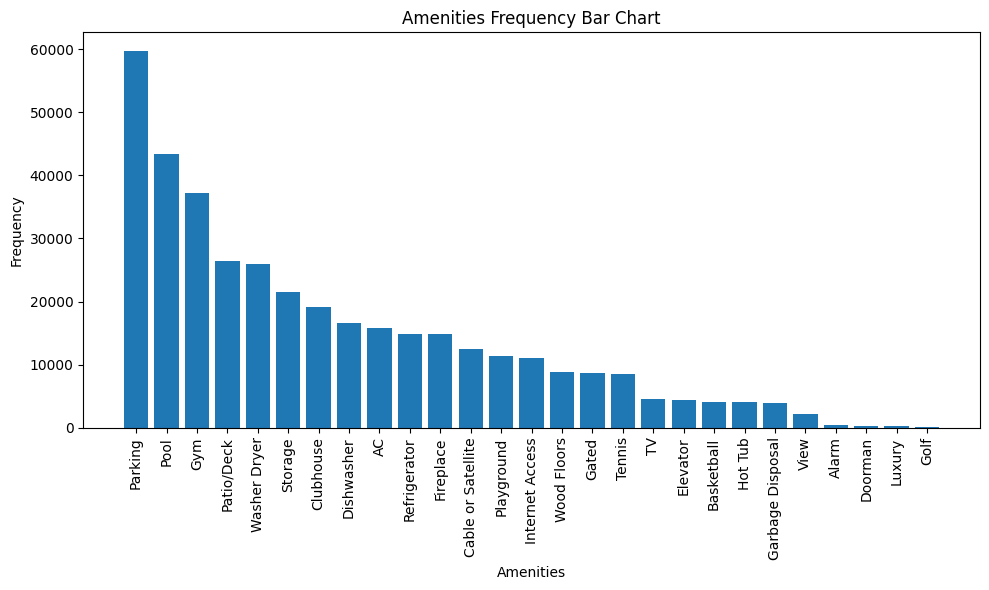

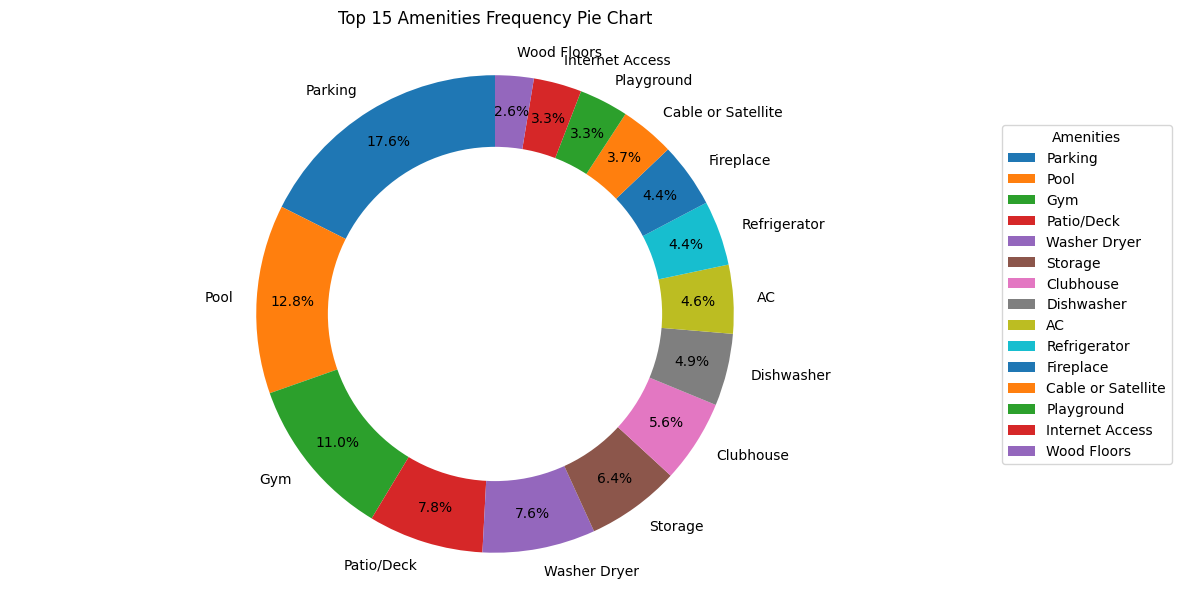

In [137]:
# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(amenities_freq_table['amenities'], amenities_freq_table['frequency'])
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.title('Amenities Frequency Bar Chart')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Select the 15 best amenities to avoid a bad display in the pie chart
top_15_amenities = amenities_freq_table.head(15)

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_15_amenities['frequency'], labels=top_15_amenities['amenities'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Top 15 Amenities Frequency Pie Chart', pad=20)  # Increase the title padding

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

# Add legend with improved positioning
plt.legend(top_15_amenities['amenities'], title='Amenities', loc='center left', bbox_to_anchor=(1, 0.5), bbox_transform=plt.gcf().transFigure)

plt.show()

Histogram

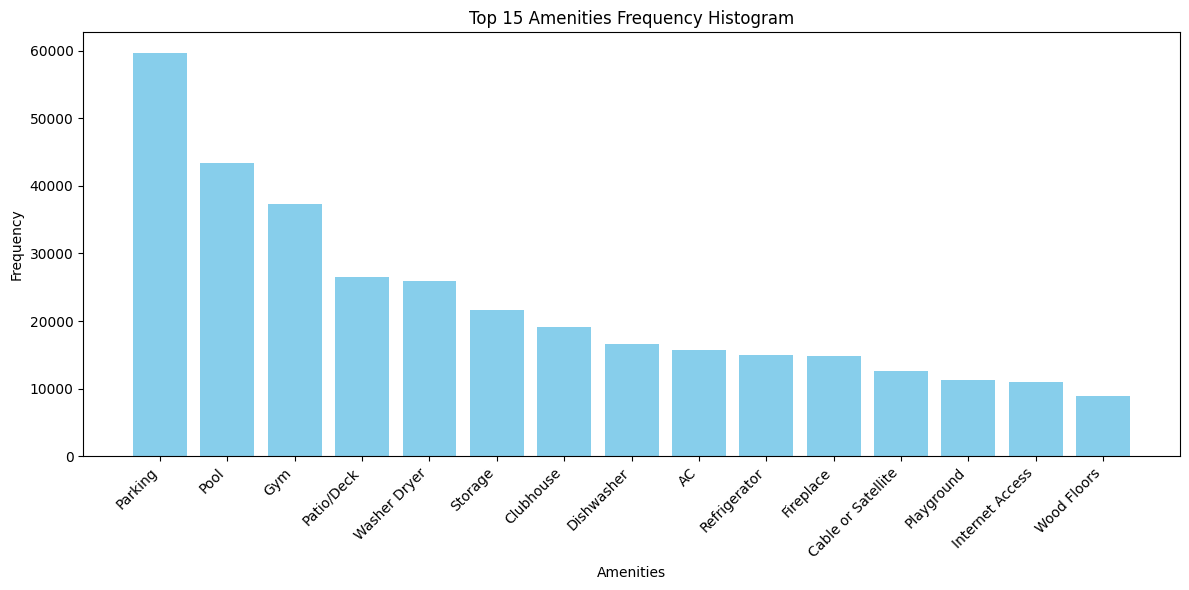

In [138]:
# Select top 15 amenities
top_15_amenities = amenities_freq_table.head(15)

# Create a histogram
plt.figure(figsize=(12, 6))
plt.bar(top_15_amenities['amenities'], top_15_amenities['frequency'], color='skyblue')
plt.title('Top 15 Amenities Frequency Histogram')
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

Summary measures and standard deviation

In [139]:
# Summary measures for 'frequency'
mean_frequency = amenities_freq_table['frequency'].mean()
median_frequency = amenities_freq_table['frequency'].median()
min_frequency = amenities_freq_table['frequency'].min()
max_frequency = amenities_freq_table['frequency'].max()

# Standard deviation for 'frequency'
std_frequency = amenities_freq_table['frequency'].std()

# Print the results
print("Summary Measures for Amenities Frequency:")
print(f'Mean Frequency: {mean_frequency}')
print(f'Median Frequency: {median_frequency}')
print(f'Minimum Frequency: {min_frequency}')
print(f'Maximum Frequency: {max_frequency}')
print(f'Standard Deviation Frequency: {std_frequency}')

Summary Measures for Amenities Frequency:
Mean Frequency: 14083.592592592593
Median Frequency: 11053.0
Minimum Frequency: 27
Maximum Frequency: 59711
Standard Deviation Frequency: 14383.34449247371


Boxplot

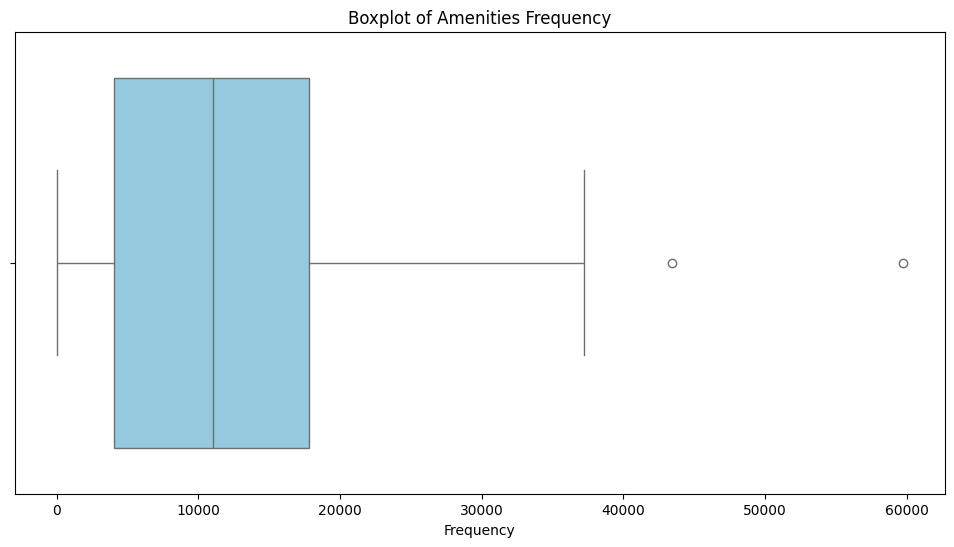

In [140]:
# Boxplot for 'frequency'
plt.figure(figsize=(12, 6))
sns.boxplot(x='frequency', data=amenities_freq_table, color='skyblue')
plt.title('Boxplot of Amenities Frequency')
plt.xlabel('Frequency')
plt.show()

<h3>Let's explore the new qualitative variable: <b>price_category</b></h3>

Frequency table

In [141]:
# Making the frequency table for the 'price_category' column
price_category_freq_table = missing_cleaned_df['price_category'].value_counts().reset_index()
price_category_freq_table.columns = ['price_category', 'frequency']
price_category_freq_table['relative frequency'] = price_category_freq_table['frequency'] / price_category_freq_table['frequency'].sum()

# Print the frequency table for 'price_category'
print(price_category_freq_table)

  price_category  frequency  relative frequency
0           high      33726            0.339644
1            low      32817            0.330490
2         medium      32755            0.329866


Bar chart and pie chart

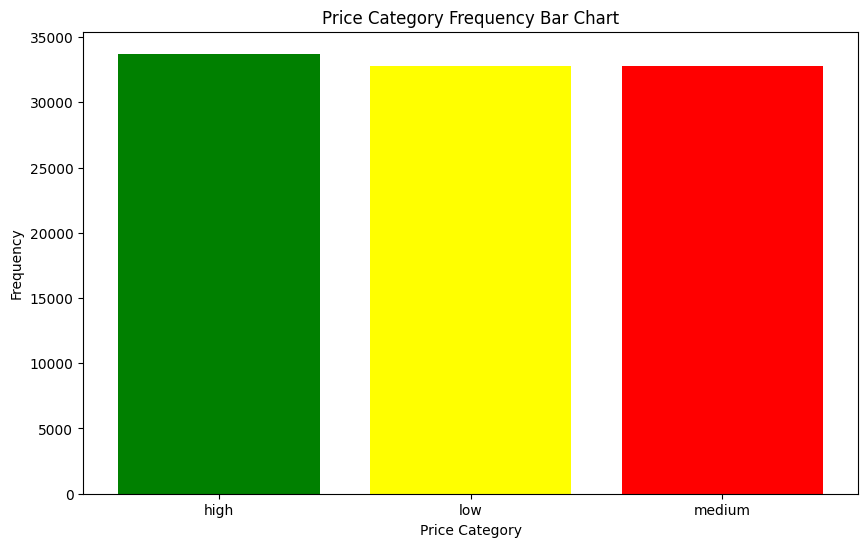

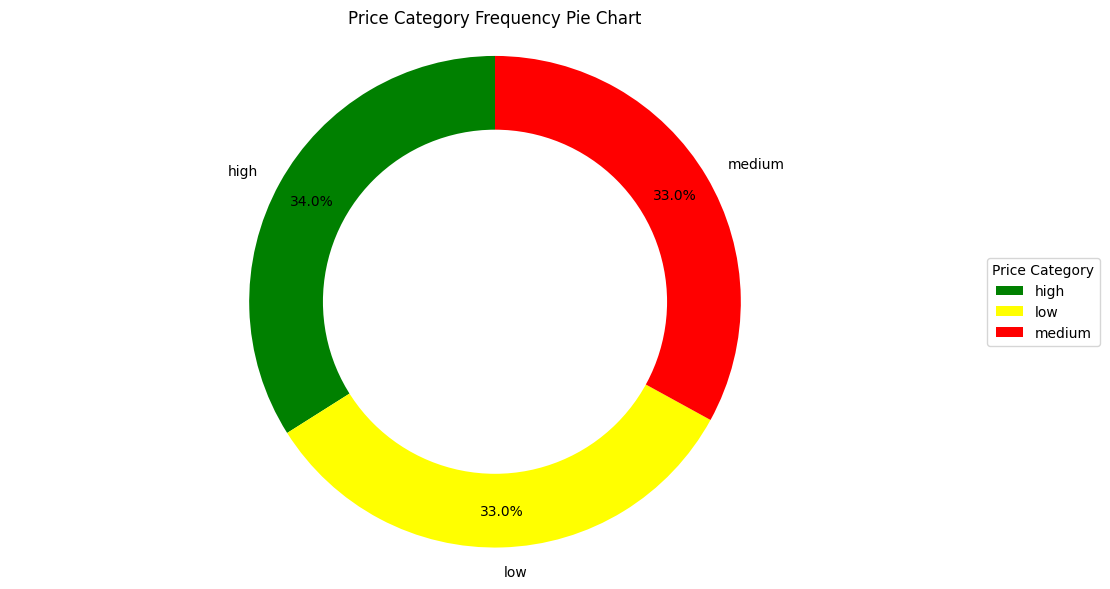

In [142]:
# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(price_category_freq_table['price_category'], price_category_freq_table['frequency'], color=['green', 'yellow', 'red'])
plt.title('Price Category Frequency Bar Chart')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.show()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(price_category_freq_table['frequency'], labels=price_category_freq_table['price_category'], autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'], pctdistance=0.85)
plt.title('Price Category Frequency Pie Chart')

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

# Add legend
plt.legend(price_category_freq_table['price_category'], title='Price Category', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Histogram

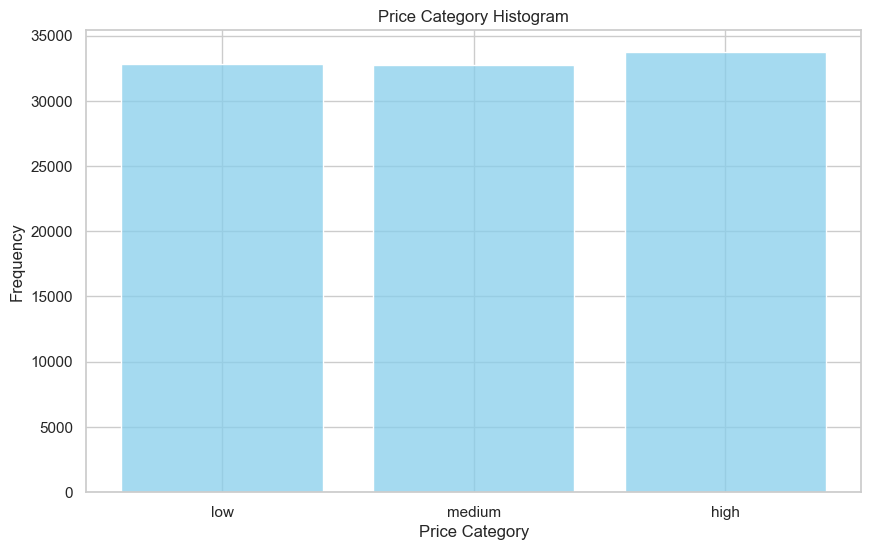

In [143]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a histogram for 'price_category'
plt.figure(figsize=(10, 6))
sns.histplot(data=missing_cleaned_df, x='price_category', discrete=True, color='skyblue', shrink=0.8)
plt.title('Price Category Histogram')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.show()

Summary measures and standard deviation

In [144]:
# Count of Price Categories
count_price_category = missing_cleaned_df['price_category'].value_counts()

# Descriptive statistics for Price Categories
summary_price_category = missing_cleaned_df['price_category'].describe()

# Print the results
print(f'Count of Price Categories:\n{count_price_category}\n')
print(f'Summary Statistics for Price Categories:\n{summary_price_category}')

Count of Price Categories:
price_category
high      33726
low       32817
medium    32755
Name: count, dtype: int64

Summary Statistics for Price Categories:
count     99298
unique        3
top        high
freq      33726
Name: price_category, dtype: object


Boxplot

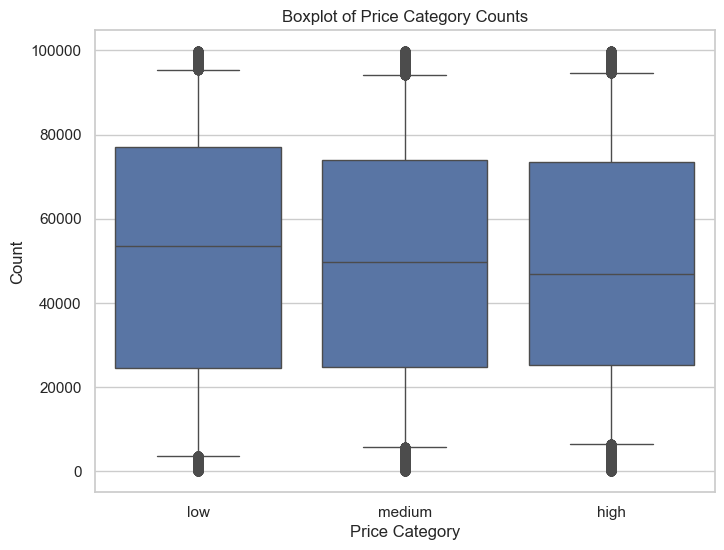

In [145]:
# Generate a boxplot for the count of 'price_category'
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category', y=missing_cleaned_df.index, data=missing_cleaned_df, whis=[5, 95])
plt.title('Boxplot of Price Category Counts')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

Outliers and skewnes

Skewness for Price Category: 1.7067369679726336
Outliers for Price Category:
Series([], Name: count, dtype: int64)


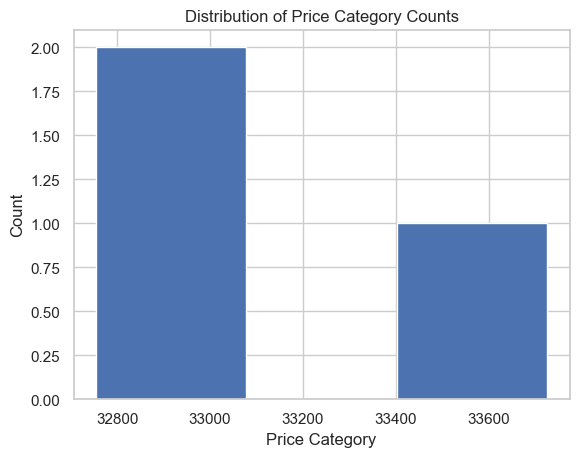

In [146]:
# Calculate skewness for 'price_category'
skewness_price_category = missing_cleaned_df['price_category'].value_counts().skew()

# Identify outliers for 'price_category'
Q1_price_category = missing_cleaned_df['price_category'].value_counts().quantile(0.25)
Q3_price_category = missing_cleaned_df['price_category'].value_counts().quantile(0.75)

IQR_price_category = Q3_price_category - Q1_price_category

lower_bound_price_category = Q1_price_category - 1.5 * IQR_price_category
upper_bound_price_category = Q3_price_category + 1.5 * IQR_price_category

outliers_price_category = missing_cleaned_df['price_category'].value_counts()[
    (missing_cleaned_df['price_category'].value_counts() < lower_bound_price_category) |
    (missing_cleaned_df['price_category'].value_counts() > upper_bound_price_category)
]

# Print skewness for 'price_category'
print(f'Skewness for Price Category: {skewness_price_category}')

# Print outliers for 'price_category'
print('Outliers for Price Category:')
print(outliers_price_category)

# You can also plot the distribution if needed
missing_cleaned_df['price_category'].value_counts().plot(kind='hist', bins=len(missing_cleaned_df['price_category'].value_counts().index))
plt.title('Distribution of Price Category Counts')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

Divide the data to train data (70%) and test data (30%).

In [147]:
# Select features and target variable

# Note:

# At the moment the features for training the model do not include amenities, city, status, whether or not pets are allowed, 
# the fee and the source of publication of the apartment, because feature encoding for these variables (label encoding) 
# is needed for the model to perform optimally in predicting the price categories.

features = ['bathrooms', 'bedrooms', 'square_feet']
target = 'price_category'

# Split the data into features and target
X = missing_cleaned_df[features]
y = missing_cleaned_df[target]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Make a multiple logistic regression analysis based on train data for classification.<br> Find the predictions (classes) for the test data and compare them to the true values

In [148]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare predictions to true values
classification_rep = classification_report(y_test, y_pred)

# Compare predicted classes to true values
comparison_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Display the comparison with the true values
print(comparison_df)

# Display the classification report
print(f'Classification Report:\n{classification_rep}')

C:\Users\indet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      True Values Predicted Values
17701         low              low
39770      medium              low
47353      medium              low
99169      medium             high
50770         low              low
...           ...              ...
80493      medium           medium
41578      medium             high
75329         low             high
28443         low           medium
57574      medium             high

[29790 rows x 2 columns]
Classification Report:
              precision    recall  f1-score   support

        high       0.48      0.57      0.52     10159
         low       0.45      0.68      0.54      9784
      medium       0.35      0.11      0.16      9847

    accuracy                           0.45     29790
   macro avg       0.43      0.45      0.41     29790
weighted avg       0.43      0.45      0.41     29790



Find the confusion matrix and calculate the accuracy of the fitted model.

In [149]:
# Finding the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing results
print(f'Confusion Matrix:\n{conf_matrix}'+'\n')
print(f'Accuracy: {accuracy}')

Confusion Matrix:
[[5760 3501  898]
 [2035 6655 1094]
 [4265 4529 1053]]

Accuracy: 0.4520980194696207


### Conclusion about the Logistic Regression Model <br> 

- <b>Precision:</b> Indicates the accuracy of positive predictions. In this context, the precision for predicting "high" is 0.48, "low" is 0.45, and "medium" is 0.36. These values suggest that the model is somewhat accurate in correctly predicting each category.

- <b>Recall:</b> Measures the ability of the model to capture instances of each class. A recall of 0.57 for "high," 0.68 for "low," and 0.11 for "medium" indicates varying degrees of success in identifying instances of each category.

- <b>F1-Score:</b> The harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for "high" is 0.52, "low" is 0.54, and "medium" is 0.16. These scores suggest that the model has challenges in achieving a balance between precision and recall for the "medium" category.

- <b>Support:</b> The number of actual occurrences of each class in the test dataset. For instance, there are 10,159 instances of "high," 9,784 instances of "low," and 9,847 instances of "medium."

- <b>Accuracy:</b> Represents the overall correctness of predictions. In this case, the model has an accuracy of 0.45, indicating that 45% of predictions are correct.

- <b>Macro Average (Macro Avg):</b> Provides the average performance across all classes, irrespective of class imbalance. The macro-average F1-score is 0.41.

- <b>Weighted Average (Weighted Avg):</b> Similar to the macro-average but considers class imbalance by weighting based on support. The weighted-average F1-score is 0.41.